In [2]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

In [3]:
IMAGE_SHAPE = (224, 224)


DATA_DIR = 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD'
TRAINING_DATA_DIR = []
VALID_DATA_DIR = []

for fold in os.listdir(DATA_DIR):
    TRAINING_DATA_DIR.append(DATA_DIR + '/' + fold + '/' + 'train_aug')
    VALID_DATA_DIR.append(DATA_DIR + '/' + fold + '/' + 'val')
print(TRAINING_DATA_DIR)

['D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD/FOLD_1/train_aug', 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD/FOLD_2/train_aug', 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD/FOLD_3/train_aug', 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD/FOLD_4/train_aug', 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_5_FOLD/FOLD_5/train_aug']


In [4]:
train_generator = []
valid_generator = []

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
for i in range(len(os.listdir(DATA_DIR))):
    train_generator.append(datagen.flow_from_directory(
        TRAINING_DATA_DIR[i],
        shuffle=True,
        target_size=IMAGE_SHAPE,
    ))
    valid_generator.append(datagen.flow_from_directory(
        VALID_DATA_DIR[i],
        shuffle=False,
        target_size=IMAGE_SHAPE,
    ))

Found 19094 images belonging to 23 classes.
Found 2387 images belonging to 23 classes.
Found 19096 images belonging to 23 classes.
Found 2387 images belonging to 23 classes.
Found 19096 images belonging to 23 classes.
Found 2387 images belonging to 23 classes.
Found 19096 images belonging to 23 classes.
Found 2387 images belonging to 23 classes.
Found 19096 images belonging to 23 classes.
Found 2387 images belonging to 23 classes.


In [5]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=23)

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

c:\Users\phamd\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
EPOCHS = 10
BATCH_SIZE = 5000
history = []


for i in range(len(os.listdir(DATA_DIR))):
    history.append(model.fit(train_generator[i],
                        steps_per_epoch=train_generator[i].samples // BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=valid_generator[i],
                        validation_steps= valid_generator[i].samples // BATCH_SIZE,
                        verbose=1
                        ))

Epoch 1/10


c:\Users\phamd\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 14s 478ms/step - loss: 3.1599 - accuracy: 0.0729
Epoch 2/10
3/3 [==============================] - 2s 411ms/step - loss: 3.1257 - accuracy: 0.0417
Epoch 3/10
3/3 [==============================] - 2s 514ms/step - loss: 3.1111 - accuracy: 0.0833
Epoch 4/10
3/3 [==============================] - 2s 504ms/step - loss: 3.0685 - accuracy: 0.1042
Epoch 5/10
3/3 [==============================] - 2s 539ms/step - loss: 3.1341 - accuracy: 0.0833
Epoch 6/10
3/3 [==============================] - 2s 624ms/step - loss: 3.1846 - accuracy: 0.0521
Epoch 7/10
3/3 [==============================] - 1s 378ms/step - loss: 3.1271 - accuracy: 0.0938
Epoch 8/10
3/3 [==============================] - 1s 396ms/step - loss: 3.1459 - accuracy: 0.0833
Epoch 9/10
3/3 [==============================] - 2s 626ms/step - loss: 3.1082 - accuracy: 0.1042
Epoch 10/10
3/3 [==============================] - 2s 629ms/step - loss: 3.0904 - accuracy: 0.0938
Epoch 1/10
3/3 [=============

In [8]:
accuracy_list = []
loss_list = []
for i in range(len(os.listdir(DATA_DIR))):
    accuracy_list.append(history[i].history['accuracy'] * 100)
    loss_list.append(history[i].history['loss'])
    print(f'Accuracy and loss of Fold {i}:', (history[i].history['accuracy']), history[i].history['loss'] )
    
print('* Overview:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')
print(f'> Loss: {np.mean(loss_list)}')


Accuracy and loss of Fold 0: [0.0729166641831398, 0.0416666679084301, 0.0833333358168602, 0.1041666641831398, 0.0833333358168602, 0.0520833320915699, 0.09375, 0.0833333358168602, 0.1041666641831398, 0.09375] [3.159878969192505, 3.125746488571167, 3.1111135482788086, 3.068537950515747, 3.1340694427490234, 3.184577226638794, 3.127143144607544, 3.145881414413452, 3.1082375049591064, 3.090386152267456]
Accuracy and loss of Fold 1: [0.0833333358168602, 0.0729166641831398, 0.0625, 0.0520833320915699, 0.1145833358168602, 0.09375, 0.0416666679084301, 0.1145833358168602, 0.0416666679084301, 0.0625] [3.104928970336914, 3.1359622478485107, 3.13384747505188, 3.166881561279297, 3.1156227588653564, 3.074953317642212, 3.143279790878296, 3.0961780548095703, 3.154675245285034, 3.1450576782226562]
Accuracy and loss of Fold 2: [0.0833333358168602, 0.0625, 0.0520833320915699, 0.03125, 0.0520833320915699, 0.0729166641831398, 0.0625, 0.0416666679084301, 0.02083333395421505, 0.0729166641831398] [3.1117188930

In [9]:
print("Training is done!")
model.save('./model/modelKeras_Test.h5')
print("Model is successfully stored!")

Training is done!
Model is successfully stored!


dict_keys(['loss', 'accuracy'])


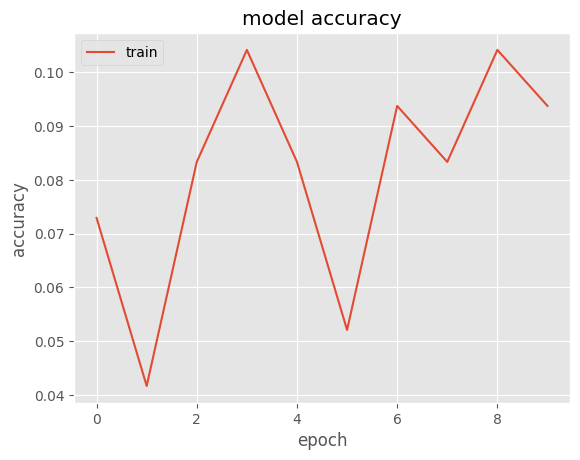

dict_keys(['loss', 'accuracy'])


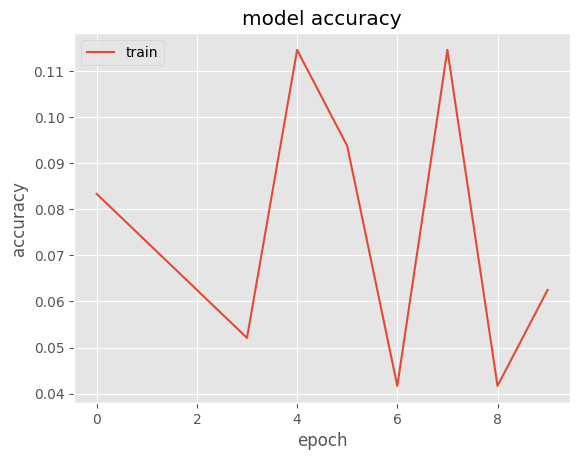

dict_keys(['loss', 'accuracy'])


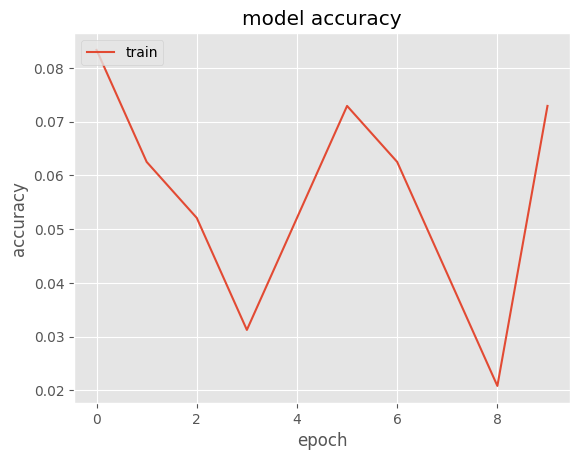

dict_keys(['loss', 'accuracy'])


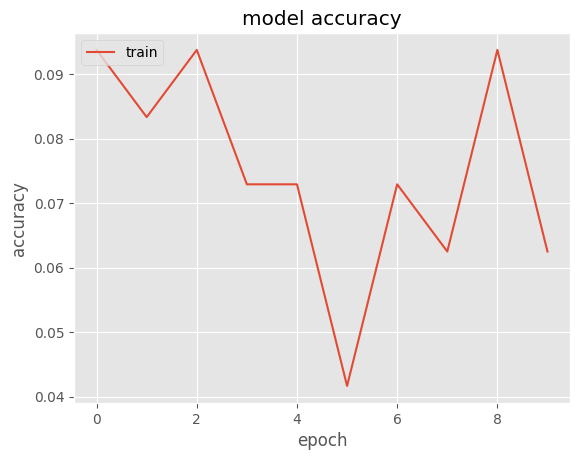

dict_keys(['loss', 'accuracy'])


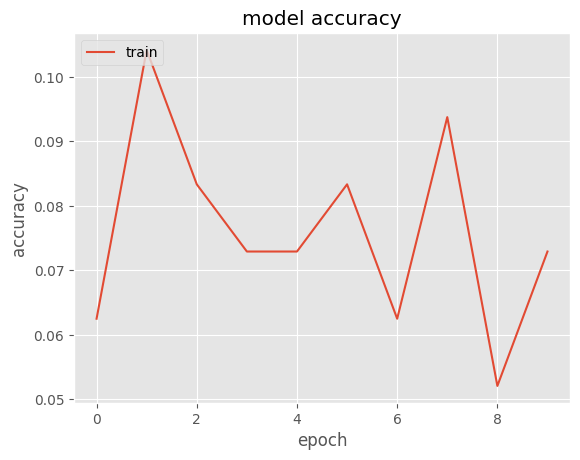

In [10]:
for i in range(len(os.listdir(DATA_DIR))):
    train_loss = history[i].history['loss']
    train_acc = history[i].history['accuracy']
    # valid_loss = history[i].history['val_loss']
    # valid_acc = history[i].history['val_accuracy']
    epoch_list = [*range(EPOCHS)]
    print(history[i].history.keys())

    #  "Accuracy"
    plt.plot(epoch_list, history[i].history['accuracy'])
    # plt.plot(epoch_list, history[i].history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()